<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Generative AI for Business Applications</center></font>
<center><font size=6>Embeddings to Transformers - Week 3</center></font>

<center><p float="center">
  <img src="https://images.pexels.com/photos/5082566/pexels-photo-5082566.jpeg" width=720></a>
<center><font size=6>Movie Recommendation System</center></font>

# Problem Statement

## Business Context

As a growing player in the Over-The-Top (OTT) streaming market, Streamora, an emerging OTT platform, has recognized the critical need to enhance user engagement through effective content discovery. The platform has implemented a movie recommendation system aimed at helping users find content based on various attributes, including titles, descriptions, and genres. However, analytics from the platform reveal a concerning trend: users frequently overlook these recommendations in favor of manually searching for movies instead. This behavior indicates a potential disconnect between the recommendations provided and the actual preferences of the viewers.

Understanding the underlying reasons for this disconnect is essential for Streamora, as it impacts user satisfaction and engagement on the platform. By improving the recommendation system to align more closely with user interests, Streamora has the opportunity to enhance viewer experience, retain customers, and drive increased viewership across its content library.

##  Objective

The current movie recommendation approach employed by Streamora is not resonating effectively with users, leading to a need for a significant reevaluation and enhancement of the recommendation strategies. To identify what can be improved, Streamora plans to explore alternative recommendation methodologies that better reflect user preferences and behaviors.

The objective is to analyze historical viewer behavior over an 11-month period, focusing on sequences of movies watched by users, and develop and implement a new recommendation engine powered by AI that improves how movies are suggested to users on the Streamora platform. Streamora aims to use the new system to drive user engagement by creating a more personalized viewing experience that resonates with its audience, fostering loyalty and higher content consumption rates.

## Data Description

**Movie Data**

* **title**: Name of the movie.
* **genres**: Space-separated list of genres associated with the movie (e.g., *Action Drama*).
* **overview**: Short summary describing the movie plot or storyline.




**Evaluation Data**

* **movie\_1** to **movie\_7**: Individual columns representing the 7 most recently watched movies by the user.
* **date**: Date on which the evaluation or recommendation is recorded.
* **movie\_watch**: The movie the user actually watched after the recommendation.
* **past_success**: Indicates whether the previous model correctly recommended the watched movie (`True`/`False`).


# Importing Necessary Libraries

We install specific tested library versions to ensure compatibility and avoid errors during development.


In [ ]:
!pip install \
    numpy==1.26.4 \
    scikit-learn==1.6.1\
    scipy==1.13.1\
    gensim==4.3.3 \
    sentence-transformers==3.4.1 \
    gradio==5.33.0\
    pandas==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.9/275.9 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Note:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

**Prompt**:

<font size=3 color="#4682B4"><b>I want to analyze the provided CSV data and build a Movie recommendation system using word2vec and sentence embeddings. Help me import the necessary Python libraries to:

1. Read and manipulate the data
2. Preprocess the text and generate embeddings
3. Measure similarity between articles
4. Suppress unnecessary warnings for a cleaner output

</font>

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

**Prompt**:

<font size=3 color="#4682B4"><b>Set a random seed based on the libraries already imported to ensure consistent model results across multiple runs.
</font>

In [ ]:
import random

# Set seeds for reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)

# Loading the Data

We’ll use the Pandas library to load the data. Pandas makes it easy to work with tables of data and take a quick look at what’s inside.

Let’s load the dataset and see what it looks like.

***Prompt***:

<font size=3 color="#4682B4"><b> Mount the Google Drive
</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

***Prompt***:

<font size=3 color="#4682B4"><b> Load the CSV file named "movie_dataset_title" and store it in the variable movie_data.
</font>

In [ ]:
movie_data = pd.read_csv('/content/movie_dataset_title.csv')


***Prompt***:

<font size=3 color="#4682B4"><b> Load the CSV file named "Evaluation_Data" and store it in the variable evaluation_data.
</font>


In [ ]:
evaluation_data=pd.read_csv('/content/Evaluation_Data.csv')

# Data Overview

## Movie Data

***Prompt***:

<font size=3 color="#4682B4"><b> Display the number of rows and columns in the `movie_data`.
</font>

In [ ]:
movie_data.shape

(4803, 3)

The dataset consists of 4803 rows and 3 columns

***Prompt***:

<font size=3 color="#4682B4"><b> Display the first 10 rows of the `movie_data`.
</font>

In [ ]:
movie_data.head(10)


,genres,overview,title
0,Action Adventure Fantasy Science Fiction,"In the 22nd century, a paraplegic Marine is di...",Avatar
1,Adventure Fantasy Action,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,Action Adventure Crime,A cryptic message from Bond’s past sends him o...,Spectre
3,Action Crime Drama Thriller,Following the death of District Attorney Harve...,The Dark Knight Rises
4,Action Adventure Science Fiction,"John Carter is a war-weary, former military ca...",John Carter
5,Fantasy Action Adventure,The seemingly invincible Spider-Man goes up ag...,Spider-Man 3
6,Animation Family,When the kingdom's most wanted-and most charmi...,Tangled
7,Action Adventure Science Fiction,When Tony Stark tries to jumpstart a dormant p...,Avengers: Age of Ultron
8,Adventure Fantasy Family,"As Harry begins his sixth year at Hogwarts, he...",Harry Potter and the Half-Blood Prince
9,Action Adventure Fantasy,Fearing the actions of a god-like Super Hero l...,Batman v Superman: Dawn of Justice


***Prompt***:

<font size=3 color="#4682B4"><b> Display the names, data types, and number of entries in the columns of the `movie_data`.
</font>

In [ ]:
movie_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4775 non-null   object
 1   overview  4800 non-null   object
 2   title     4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


The dataset contains 4,803 movie records with 3 key features:

- title: Movie name — available for all entries.
- overview: Missing in 3 records.
- genres: Missing in 28 records.

***Prompt***:

<font size=3 color="#4682B4"><b> Drop the missing values from movie_data.
</font>

In [ ]:
movie_data.dropna(inplace=True)

***Prompt***:

<font size=3 color="#4682B4"><b>Reset the index of the rows of `movie_data`
</font>

In [ ]:
movie_data.reset_index(drop=True, inplace=True)

## Evaluation Data

***Prompt***:

<font size=3 color="#4682B4"><b> Display the number of rows and columns in the `evaluation_data`.
</font>

In [ ]:
evaluation_data.shape

(2000, 10)

The dataset consists of 2000 rows and 10 columns

***Prompt***:

<font size=3 color="#4682B4"><b> Display the first 10 rows of the `evaluation_data`.
</font>

In [ ]:
evaluation_data.head(10)

,movie_1,movie_2,movie_3,movie_4,movie_5,movie_6,movie_7,date,movie_watch,past_success
0,The Last Emperor,The Conjuring 2,Conspiracy Theory,Who Killed the Electric Car?,Skyline,No Escape,Big Momma's House,2024-01-01,Cotton Comes to Harlem,True
1,Face/Off,The Hunger Games: Mockingjay - Part 1,All Good Things,Ray,Extraordinary Measures,Notting Hill,Teeth and Blood,2024-01-01,Desert Blue,False
2,The Spectacular Now,Love and Death on Long Island,August Rush,May,Sunday School Musical,Battle of the Year,Broken City,2024-01-01,Crazy/Beautiful,True
3,Ace Ventura: Pet Detective,Joe Dirt,The Cat in the Hat,Roll Bounce,Navy Seals vs. Zombies,The Lost Weekend,Lethal Weapon 3,2024-01-01,Welcome Home Roscoe Jenkins,False
4,Pontypool,Up,Reservoir Dogs,Religulous,Blood Work,The Help,Raiders of the Lost Ark,2024-01-01,Free State of Jones,False
5,National Lampoon's Vacation,The Queen,Carrie,西游记之孙悟空三打白骨精,Obvious Child,Promised Land,Julia,2024-01-01,Big,True
6,Open Range,The Last Shot,The Secret Life of Walter Mitty,East Is East,Phantasm II,Epic,Secret Window,2024-01-02,Chain of Command,False
7,E.T. the Extra-Terrestrial,L!fe Happens,Getaway,Godsend,Hoot,Alive,The Caveman's Valentine,2024-01-02,Thr3e,False
8,Amnesiac,X-Men: The Last Stand,What to Expect When You're Expecting,Inside Man,De jurk,It's All Gone Pete Tong,Need for Speed,2024-01-02,Pride & Prejudice,False
9,Show Boat,The River Wild,Let's Be Cops,Toy Story 2,Rien ne va plus,La sirène du Mississipi,もののけ姫,2024-01-02,The Incredibly True Adventure of Two Girls In ...,False


***Prompt***:

<font size=3 color="#4682B4"><b> Display the names, data types, and number of entries in the columns of the `evaluation_data`.
</font>

In [ ]:
evaluation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_1       2000 non-null   object
 1   movie_2       2000 non-null   object
 2   movie_3       2000 non-null   object
 3   movie_4       2000 non-null   object
 4   movie_5       2000 non-null   object
 5   movie_6       2000 non-null   object
 6   movie_7       2000 non-null   object
 7   date          2000 non-null   object
 8   movie_watch   2000 non-null   object
 9   past_success  2000 non-null   bool  
dtypes: bool(1), object(9)
memory usage: 142.7+ KB


The dataset contains **2000 rows** and includes the following columns:

* **`movie_1` to `movie_7`**: These 7 columns represent recently watched movies by a user. Each column contains movie names as **object** datatype.
* **`movie_watch`**: An **object** datatype column indicating the movie currently being watched.
* **`past_success`**: A **boolean** column indicating whether past recommendations were successful.
* **`date`**: An **object** datatype column representing the date information.

There are **no missing values** in the dataset.


# EDA

***Prompt***:

<font size=3 color="#4682B4"><b>Visualize the monthly success rate from past model predictions and explain the code step by step.
</font>

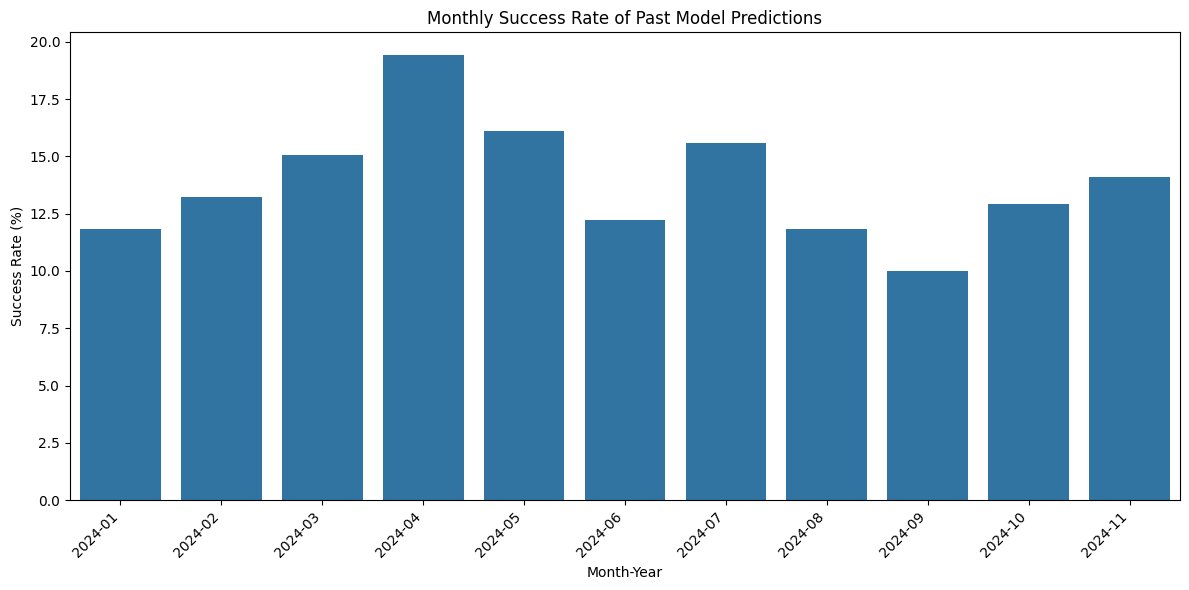

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'date' column to datetime objects
# This is necessary to extract month and year information easily.
evaluation_data['date'] = pd.to_datetime(evaluation_data['date'])

# Extract month and year from the 'date' column
# We combine year and month to group data by calendar month across years.
evaluation_data['month_year'] = evaluation_data['date'].dt.to_period('M')

# Group by month and count the occurrences of each 'Past success' value
# This gives us the total count of True and False successes for each month.
monthly_success_counts = evaluation_data.groupby('month_year')['past_success'].value_counts().unstack(fill_value=0)

# Calculate the percentage of 'True' success for each month
# We divide the count of True successes by the total count (True + False) for that month and multiply by 100.
monthly_success_counts['Success Percentage'] = (monthly_success_counts[True] / (monthly_success_counts[True] + monthly_success_counts[False])) * 100

# Sort the data by month and year
# This ensures the plot displays the months in chronological order.
monthly_success_counts = monthly_success_counts.sort_index()

# Create the plot
# We use seaborn for a visually appealing bar plot.
plt.figure(figsize=(12, 6)) # Set the size of the figure for better readability
sns.barplot(x=monthly_success_counts.index.astype(str), y='Success Percentage', data=monthly_success_counts) # Create a bar plot with month_year on x-axis and Success Percentage on y-axis. Use a colormap 'viridis'.

# Add labels and title to the plot
plt.xlabel('Month-Year') # Label for the x-axis
plt.ylabel('Success Rate (%)') # Label for the y-axis
plt.title('Monthly Success Rate of Past Model Predictions') # Title of the plot
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability, especially if there are many months
plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Display the plot
plt.show()

**Observation:**

The success rate of past model recommendations varies **between 10% and 19.4%** across the months.

* The **highest success rate** was observed in **April 2024 (\~19.4%)**, indicating peak performance of the past recommendation model.
* The **lowest success rate** was recorded in **September 2024 (\~10%)**, showing a drop in effectiveness.


***Prompt***:

<font size=3 color="#4682B4"><b>Visualize the overall success percentage from the previous model.</font>

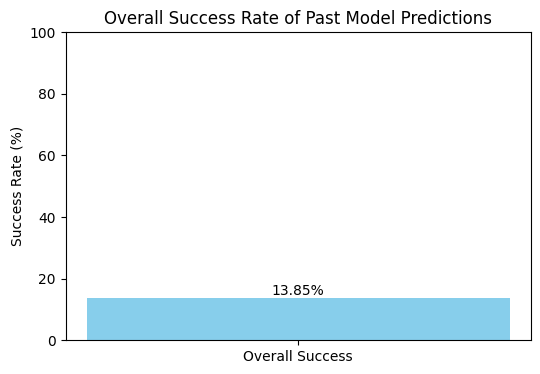

In [ ]:
# Calculate the overall success percentage
overall_success_percentage = (evaluation_data['past_success'].sum() / len(evaluation_data)) * 100

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(6, 4))

# Create a bar plot for overall success
ax.bar(['Overall Success'], [overall_success_percentage], color='skyblue')

# Add the percentage value on top of the bar
ax.text('Overall Success', overall_success_percentage + 1, f'{overall_success_percentage:.2f}%', ha='center')

# Add labels and title
ax.set_ylabel('Success Rate (%)')
ax.set_title('Overall Success Rate of Past Model Predictions')
ax.set_ylim(0, 100) # Set y-axis limit to 0-100%

# Display the plot
plt.show()

**Observation**

- The past model achieved a 13.85% success rate in recommending movies that were actually watched.


# Model Building

In this project, we’ll experiment with **two different approaches** to generate vector representations of movie metadata:

1. **Word2Vec-based model** – which learns word-level embeddings from tokenized text inputs.
2. **Sentence Transformer-based model** – which captures semantic meaning at the sentence level using pre-trained transformer architectures.

These embeddings will serve as the foundation for calculating movie-to-movie similarity and powering our recommendation system.

Let’s begin by preparing the data and training the first embedding model.


## Word2Vec

**Word2Vec** is a technique that converts words into vector representations based on their contextual relationships in text. These word embeddings capture semantic meaning and can be averaged to represent longer pieces of text like movie descriptions.


**Process of Building a Word2Vec-Based Recommendation System**

1. **Text Preparation**
   Combine the relevant textual fields—**title**, **genres**, and **overview**—into a single string for each movie. Preprocess this combined text by tokenizing, lowercasing, and removing stopwords or punctuation to prepare it for model training.

2. **Model Training**
   Train a Word2Vec model on the preprocessed tokens. This model learns vector representations for each word based on their co-occurrence patterns in the corpus.

3. **Average Vector Calculation**
   Define a function to compute the average Word2Vec embedding for any given text. This is done by averaging the vectors of all valid tokens present in the trained vocabulary.

4. **Embedding Computation**
   For each movie, compute a **single embedding** by taking the average of the word vectors from the combined text (title + genres + overview).

5. **Generating Recommendations**
   To recommend movies:

   * Take the list of recently watched movies by a user.
   * Compute the average embedding of these movies using their content embeddings.
   * Calculate cosine similarity between this average vector and all other movie embeddings.
   * Return the top-ranked movies that are most similar to the user's recent viewing history.


### Model Building

#### <font size=4>**Step 1: Text Preperation**

Combines important text fields (like title, genre, and description) and cleans them by removing punctuation, stopwords, and converting everything to lowercase. This helps the model focus on the actual content.

***Prompt***:

<font size=3 color="#4682B4"><b>Create a copy of the dataset named `data_word2vec`.

</font>

**Note** We created `data_word2vec` to store tokens, embeddings independently without modifying the original DataFrame.


In [ ]:
data_word2vec=movie_data.copy()

**NOTE:** The `simple_preprocess` function from `gensim.utils` tokenizes the text, lowercases all words, and removes punctuation and very short tokens. It prepares the text for training the Word2Vec model by converting it into a clean list of meaningful words.


***Prompt***:

<font size=3 color="#4682B4"><b>Combine title, genres, and overview into a single text field and preprocess it into tokens using `simple_preprocess`.


</font>

In [ ]:
from gensim.utils import simple_preprocess
data_word2vec['text'] = data_word2vec['title'] + ' ' + data_word2vec['genres'].replace('|', ' ', regex=True) + ' ' + data_word2vec['overview']
data_word2vec['tokens'] = data_word2vec['text'].apply(lambda x: simple_preprocess(x))

* Python `apply()` function is used to apply a function (built-in, custom, or lambda) to each row or column of a DataFrame. It's useful for quickly transforming data without writing loops.

*  Python `lambda()` functions are small, anonymous functions created with the lambda keyword and are useful for quick, throwaway operations without formally defining a function


####<font size=4>**Step 2: Model Training**

Trains the system to understand word meanings based on how often and where words appear together. This helps capture relationships between similar or related terms.

***Prompt***:

<font size=3 color="#4682B4"><b>Train the word2vec model preprocesssed data

</font>

In [ ]:
model_word2vec = Word2Vec(sentences=data_word2vec['tokens'], vector_size=100, window=5, min_count=1, workers=4,seed=42)

**NOTE**: We don't always use a pretrained Word2Vec model because it's trained on general text (like news articles) and may not capture the specific vocabulary, context, or relationships relevant to a particular domain—like movies, medicine, or legal text. In such cases, training on your own data helps create embeddings that better reflect the meanings and similarities important for your task.

Short explanation of Word2Vec hyperparameters used:

* **`sentences`**: Input data — list of tokenized sentences (your `tokens` column).
* **`vector_size=100`**: Size of the word embeddings (each word is represented by a 100-dimensional vector).
* **`window=5`**: Context window size — the number of words before and after a target word to consider for training.
* **`min_count=1`**: Ignores words with total frequency lower than 1 (i.e., includes all words).
* **`workers=4`**: Number of CPU cores used for parallel training.
* **`seed=42`**: Random seed to ensure reproducibility.


#### <font size=4>**Step 3: Average Vector Calculation**

Averages the embeddings of the individual words to provide a unified representation that captures the overall semantic meaning of the sentence by combining the contributions from all words

- Also makes it easier to compare sentences of different lengths as they're all transformed into vectors of the same dimension.

***Prompt***:

<font size=3 color="#4682B4"><b>Define a function to get the average Word2Vec vector for text.

</font>

In [ ]:
def get_avg_word_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)


#### <font size=4>**Step 4: Embedding Computation**

Converts each word into a fixed-length vector based on its content. These vectors help the system compare how similar different items are.

***Prompt***:

<font size=3 color="#4682B4"><b>Compute the embedding of each row


</font>

In [ ]:
data_word2vec['embedded_vector'] = data_word2vec['tokens'].apply(lambda x: get_avg_word_vector(x, model_word2vec))

In this code:
- It calculates the average word vector for each list of tokens using the Word2Vec model.


#### <font size=4>**Step 5: Generating Recommedations**


Using the average embedding of recently watched movies captures the user's general taste. Comparing this with other movies using cosine similarity helps find content that is semantically similar. Excluding already-watched items ensures that the recommendations are fresh and relevant.

***Prompt***:

<font size=3 color="#4682B4"><b>Generate a movie recommendation function based on the Word2Vec embeddings of the information of the movies watched recently by the user.
</font>

In [ ]:
def word2vec_recommendations(recently_watched_titles, data, model, n_recommendations=10):

    # Get embeddings for the recently watched movies
    watched_embeddings = []
    for title in recently_watched_titles:
        movie_row = data[data['title'] == title]
        if not movie_row.empty:
            watched_embeddings.append(movie_row.iloc[0]['embedded_vector'])

    if not watched_embeddings:
        return ["Could not find embeddings for recently watched movies."]

    # Compute the average embedding of the recently watched movies
    avg_watched_embedding = np.mean(watched_embeddings, axis=0)

    # Calculate cosine similarity between the average watched embedding and all movie embeddings
    all_embeddings = np.vstack(data['embedded_vector'].values)
    similarities = cosine_similarity([avg_watched_embedding], all_embeddings)[0]

    # Get the indices of the top n most similar movies
    # Exclude movies that were recently watched
    recommended_indices = similarities.argsort()[::-1] # Sort in descending order

    recommended_titles = []
    for idx in recommended_indices:
        movie_title = data.iloc[idx]['title']
        if movie_title not in recently_watched_titles:
            recommended_titles.append(movie_title)
            if len(recommended_titles) >= n_recommendations:
                break

    return recommended_titles

Let's generate recommendations from the movies we've already watched.

***Prompt***:

<font size=3 color="#4682B4"><b>Generate recommendations using the Word2Vec model for the watched movies: ['The Avengers', 'Iron Man', 'Man of Steel'].
</font>

In [ ]:
watched_movies = ['The Avengers', 'Iron Man', 'Man of Steel']
word2vec_recommendations(watched_movies, data_word2vec, model_word2vec)


['Heroes of Dirt',
 'When a Stranger Calls',
 'Species',
 'Bangkok Dangerous',
 'The Good Guy',
 'L.I.E. Long Island Expressway',
 'Live Free or Die Hard',
 'Malevolence',
 'Creepshow 2',
 'Oblivion']

The Word2vec model produced a mix of results. While movies like *Live Free or Die Hard*, *Oblivion*, and *Species* somewhat aligned with superhero themes through action and sci-fi elements, many recommendations such as *When a Stranger Calls*, *The Good Guy*, and *Creepshow 2* did not match the tone or genre, indicating weak alignment with the original superhero movies.




### Evaluation

**NOTE:** We create a list of past movies so it can be easily passed into the recommendation function.

***Prompt***:

<font size=3 color="#4682B4"><b>Make a list of list of past movies watched by user
</font>

In [ ]:
past_movies = evaluation_data[['movie_1', 'movie_2', 'movie_3', 'movie_4', 'movie_5', 'movie_6', 'movie_7']].values.tolist()

***Prompt***:

<font size=3 color="#4682B4"><b>Take the past_movies list and generate the recommendation from word2vec model


</font>

In [ ]:
word2vec_recommendations_list = []
for watched_movies_list in past_movies:
    # Filter out None values from the watched_movies_list
    valid_watched_movies = [movie for movie in watched_movies_list if movie is not None]
    recommendations = word2vec_recommendations(valid_watched_movies, data_word2vec, model_word2vec, n_recommendations=10)
    word2vec_recommendations_list.append(recommendations)

# Print the first few recommendations from the word2vec model
print("Word2Vec Recommendations for the first row:", word2vec_recommendations_list[0])

Word2Vec Recommendations for the first row: ['Cat People', 'Brick Mansions', 'Stake Land', 'Aladdin', 'Beastmaster 2: Through the Portal of Time', 'Charlie Bartlett', 'Free State of Jones', "My Sister's Keeper", 'Unfinished Business', 'Predator 2']


***Prompt***:

<font size=3 color="#4682B4"><b>Check whether each movie_watch appears in the corresponding recommended list and return a DataFrame with the date, movie watched, and match status.

</font>

In [ ]:
evaluation_data['word2vec_match'] = evaluation_data.apply(lambda row: row['movie_watch'] in word2vec_recommendations_list[row.name], axis=1)

result_df = evaluation_data[['date', 'movie_watch', 'word2vec_match']]
result_df

,date,movie_watch,word2vec_match
0,2024-01-01,Cotton Comes to Harlem,False
1,2024-01-01,Desert Blue,True
2,2024-01-01,Crazy/Beautiful,False
3,2024-01-01,Welcome Home Roscoe Jenkins,True
4,2024-01-01,Free State of Jones,True
...,...,...,...
1995,2024-11-28,Big Daddy,False
1996,2024-11-28,The Grace Card,True
1997,2024-11-28,Doug's 1st Movie,False
1998,2024-11-29,Midnight Cowboy,False


***Prompt***:

<font size=3 color="#4682B4"><b>Visualise the overall recommendation success rate achieved by the SentenceTransformer model.


</font>

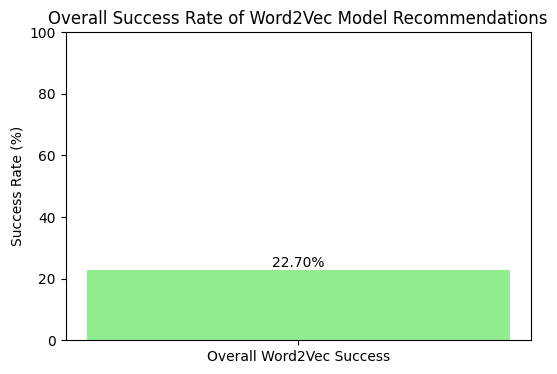

In [ ]:
# Calculate the overall success percentage for Word2Vec
overall_word2vec_success_percentage = (evaluation_data['word2vec_match'].sum() / len(evaluation_data)) * 100

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(6, 4))

# Create a bar plot for overall success
ax.bar(['Overall Word2Vec Success'], [overall_word2vec_success_percentage], color='lightgreen')

# Add the percentage value on top of the bar
ax.text('Overall Word2Vec Success', overall_word2vec_success_percentage + 1, f'{overall_word2vec_success_percentage:.2f}%', ha='center')

# Add labels and title
ax.set_ylabel('Success Rate (%)')
ax.set_title('Overall Success Rate of Word2Vec Model Recommendations')
ax.set_ylim(0, 100) # Set y-axis limit to 0-100%

# Display the plot
plt.show()

**Observation:**
- The Word2Vec model achieves an average recommendation success rate of 22.7%.


**NOTE:** Monthly success refers to the percentage of watched movies that were present in the recommendation list provided by the model. It indicates how effectively the model's recommendations align with actual user behavior.


***Prompt***:

<font size=3 color="#4682B4"><b>Visualise a monthly success chart by group the data based on the watch date

</font>

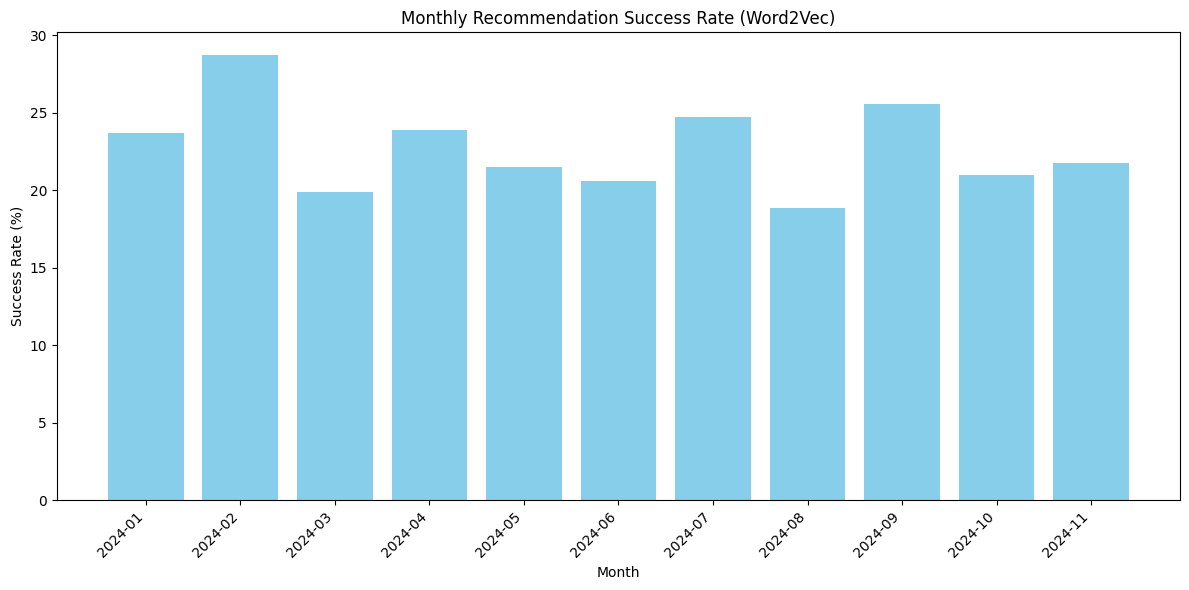

In [ ]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime objects
result_df['date'] = pd.to_datetime(result_df['date'])

# Extract month and year
result_df['month_year'] = result_df['date'].dt.to_period('M')

# Group by month and count total watches and matches
monthly_summary = result_df.groupby('month_year').agg(
    total_watches=('movie_watch', 'count'),
    successful_recommendations=('word2vec_match', lambda x: (x == True).sum())
).reset_index()

# Calculate success rate
monthly_summary['success_rate'] = (monthly_summary['successful_recommendations'] / monthly_summary['total_watches']) * 100

# Sort by month and year
monthly_summary = monthly_summary.sort_values(by='month_year')

# Convert month_year to string for plotting
monthly_summary['month_year_str'] = monthly_summary['month_year'].astype(str)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_summary['month_year_str'], monthly_summary['success_rate'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Success Rate (%)')
plt.title('Monthly Recommendation Success Rate (Word2Vec)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observation**

* The **success rate ranges between \~17% and 27%**, indicating moderate performance of the Word2Vec-based recommendation system.
* The **highest success rate** is observed in **Feb 2024 (\~27%)**.
* The **lowest success rate** occurs in **September and November 2024 (\~16–17%)**

**Note:** The observations presented are based on the output obtained after training our model. However, since we're using neural network-based architectures here, the results may vary slightly with multiple executions.

## Sentence Transformer

**Sentence Transformers** are models that generate dense vector representations (embeddings) of sentences or texts. These embeddings capture the semantic meaning of the input text, making them suitable for tasks like similarity comparison and recommendation.

**Process of Building a SentenceTransformer-Based Recommendation System**

1. **Creating a Separate Embedding DataFrame**
   We create a new DataFrame, `data_sentf`, to store the SentenceTransformer-based embeddings independently, ensuring the original movie data remains unmodified.

2. **Model Loading**
   Load a pre-trained SentenceTransformer model such as `'all-MiniLM-L6-v2'`, which offers a good balance of performance and efficiency for semantic similarity tasks.

3. **Generating and Storing Combined Embeddings**
   For each movie, compute individual embeddings for the **title**, **genres**, and **overview** using the loaded SentenceTransformer model. Add these embeddings together to form a single combined embedding that captures the movie’s overall content. Store the final embeddings in `data_sentf` for similarity comparison.

4. **Generating Recommendations**
   To generate recommendations:

   * Take a list of movies recently watched by a user.
   * Compute the average embedding of these movies.
   * Calculate cosine similarity between this average embedding and those of all other movies.
   * Return the top-ranked similar movies, excluding those already watched.



### Model Building

#### <font size=4>**Step 1: Creating a Separate Embedding DataFrame**

We created `data_sentf` to store embeddings independently without modifying the original DataFrame.


***Prompt***:

<font size=3 color="#4682B4"><b>Create a copy of the dataset named `data_sentf`.

</font>

In [ ]:
data_sentf=movie_data.copy()

#### <font size=4>**Step 2: Model Loading**

Using a pre-trained SentenceTransformer model allows us to leverage powerful language understanding without the need to train from scratch. Models like 'all-MiniLM-L6-v2' are optimized for capturing semantic similarity efficiently.

***Prompt***:

<font size=3 color="#4682B4"><b>Load the pre-trained SentenceTransformer model `all-MiniLM-L6-v2`.

</font>

- We use the all-MiniLM-L6-v2 model to generate compact and efficient sentence embeddings suitable for semantic similarity tasks.
- Alternatively, models like **`paraphrase-MpNet-base-v2`** can also be used, though they may require more computational resources.


In [ ]:
model_sentf = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### <font size=4>**Step 3: Generating and Storing Combined Embeddings**

Creating embeddings for each text field (title, genres, overview) allows the model to capture different aspects of the content. Adding them together gives a balanced and complete representation. Storing these combined embeddings makes the similarity comparison faster and avoids repeated computation.

***Prompt***:


<font size=3 color="#4682B4"><b>Create embeddings for all the movies in the dataset based on their information (combination of genre, overview, and title) using the SentenceTransformer model.
</font>

In [ ]:

def get_combined_embedding(title, genres, overview, model):
    # Create a combined string
    combined_text = f"{title} {genres} {overview}"
    # Generate embedding for the combined text
    embedding = model.encode(combined_text)
    return embedding

# Apply the function to create embeddings for all movies
data_sentf['embedded_vector'] = data_sentf.apply(
    lambda row: get_combined_embedding(row['title'], row['genres'], row['overview'], model_sentf), axis=1
)

#### <font size=4>**Step 4: Generating Recommendations**

Using the average embedding of recently watched movies captures the user's general taste. Comparing this with other movies using cosine similarity helps find content that is semantically similar. Excluding already-watched items ensures that the recommendations are fresh and relevant.

***Prompt***:

<font size=3 color="#4682B4"><b>Generate movie recommendations function based on the Sentence Transformer embeddings of the information of the movies watched recently by the user.

</font>

In [ ]:
def recommend_movies_sentf(watched_movies_titles, data, model, n=10):

    watched_movies_embeddings = []
    for title in watched_movies_titles:
        movie = data[data['title'] == title]
        if not movie.empty:
            # Use 'combined_embedding' column here
            watched_movies_embeddings.append(movie.iloc[0]['embedded_vector'])


    if not watched_movies_embeddings:
        return []

    # Calculate the average embedding of watched movies
    avg_embedding = np.mean(watched_movies_embeddings, axis=0)

    # Calculate cosine similarity with all other movies using 'combined_embedding'
    similarities = cosine_similarity([avg_embedding], np.vstack(data['embedded_vector'].values))

    # Get the indices of the most similar movies (excluding the watched ones)
    similar_indices = similarities.argsort()[0][::-1]

    recommended_movies = []
    for index in similar_indices:
        movie_title = data.iloc[index]['title']
        if movie_title not in watched_movies_titles:
            recommended_movies.append(movie_title)
        if len(recommended_movies) == n:
            break

    return recommended_movies


Let's generate recommendations from the movies we've already watched.

***Prompt***:

<font size=3 color="#4682B4"><b>Generate recommendations using the Sentence Transformer model for the watched movies: ['The Avengers', 'Iron Man', 'Man of Steel'].
</font>

In [ ]:
last_three = ['The Avengers', 'Iron Man', 'Man of Steel']
res=recommend_movies_sentf(last_three,data_sentf,model_sentf,10)
res

['Iron Man 3',
 'Iron Man 2',
 'Avengers: Age of Ultron',
 'Captain America: Civil War',
 'Steel',
 'Men of War',
 'Captain America: The First Avenger',
 'The League of Extraordinary Gentlemen',
 'Thor',
 'The Man from U.N.C.L.E.']

Sentence Transformer model delivered strong, relevant recommendations. Titles like *Iron Man 2*, *Avengers: Age of Ultron*, *Captain America: Civil War*, and *Thor* are directly connected to the original superhero universe or share similar themes of action, heroism, and world-building. These suggestions show a much better understanding of genre and viewer intent.

### Evaluation

***Prompt***:

<font size=3 color="#4682B4"><b>Take the past_movies list and generate the recommendation from sentence tranformer model


</font>

In [ ]:

sentf_recommendations = []
for watched_movies_list in past_movies:
    # Filter out None values from the watched_movies_list
    valid_watched_movies = [movie for movie in watched_movies_list if movie is not None]
    recommendations = recommend_movies_sentf(valid_watched_movies, data_sentf, model_sentf, n=10)
    sentf_recommendations.append(recommendations)

# Print the first few recommendations from the sentence transformer model
print("Sentence Transformer Recommendations for the first row:", sentf_recommendations[0])

Sentence Transformer Recommendations for the first row: ['The Conjuring', 'The Final Destination', 'Unknown', 'Sinister', 'Frailty', 'Insidious', 'Mirrors', 'Crash', 'The Darkest Hour', 'Urban Legend']


***Prompt***:

<font size=3 color="#4682B4"><b>Check whether each movie_watch appears in the corresponding recommended list and return a DataFrame with the date, movie watched, and match status.

</font>

In [ ]:

evaluation_data['sentf_match'] = evaluation_data.apply(
    lambda row: row['movie_watch'] in sentf_recommendations[row.name], axis=1
)

result_df = evaluation_data[['date', 'movie_watch', 'sentf_match']]
result_df


,date,movie_watch,sentf_match
0,2024-01-01,Cotton Comes to Harlem,False
1,2024-01-01,Desert Blue,False
2,2024-01-01,Crazy/Beautiful,True
3,2024-01-01,Welcome Home Roscoe Jenkins,False
4,2024-01-01,Free State of Jones,False
...,...,...,...
1995,2024-11-28,Big Daddy,True
1996,2024-11-28,The Grace Card,False
1997,2024-11-28,Doug's 1st Movie,True
1998,2024-11-29,Midnight Cowboy,True


***Prompt***:

<font size=3 color="#4682B4"><b>Visualise the overall recommendation success rate achieved by the SentenceTransformer model.


</font>

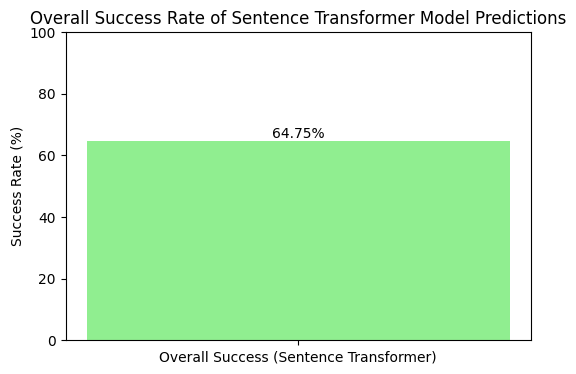

In [ ]:

# Calculate the overall success percentage for the Sentence Transformer model
overall_success_percentage_sentf = (evaluation_data['sentf_match'].sum() / len(evaluation_data)) * 100

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(6, 4))

# Create a bar plot for overall success
ax.bar(['Overall Success (Sentence Transformer)'], [overall_success_percentage_sentf], color='lightgreen')

# Add the percentage value on top of the bar
ax.text('Overall Success (Sentence Transformer)', overall_success_percentage_sentf + 1, f'{overall_success_percentage_sentf:.2f}%', ha='center')

# Add labels and title
ax.set_ylabel('Success Rate (%)')
ax.set_title('Overall Success Rate of Sentence Transformer Model Predictions')
ax.set_ylim(0, 100) # Set y-axis limit to 0-100%

# Display the plot
plt.show()


**Observation:**
- The Sentence Transformer model achieves an average recommendation success rate of 64.75%.


***Prompt***:

<font size=3 color="#4682B4"><b>Visualise a monthly success chart by group the data based on the watch date

</font>

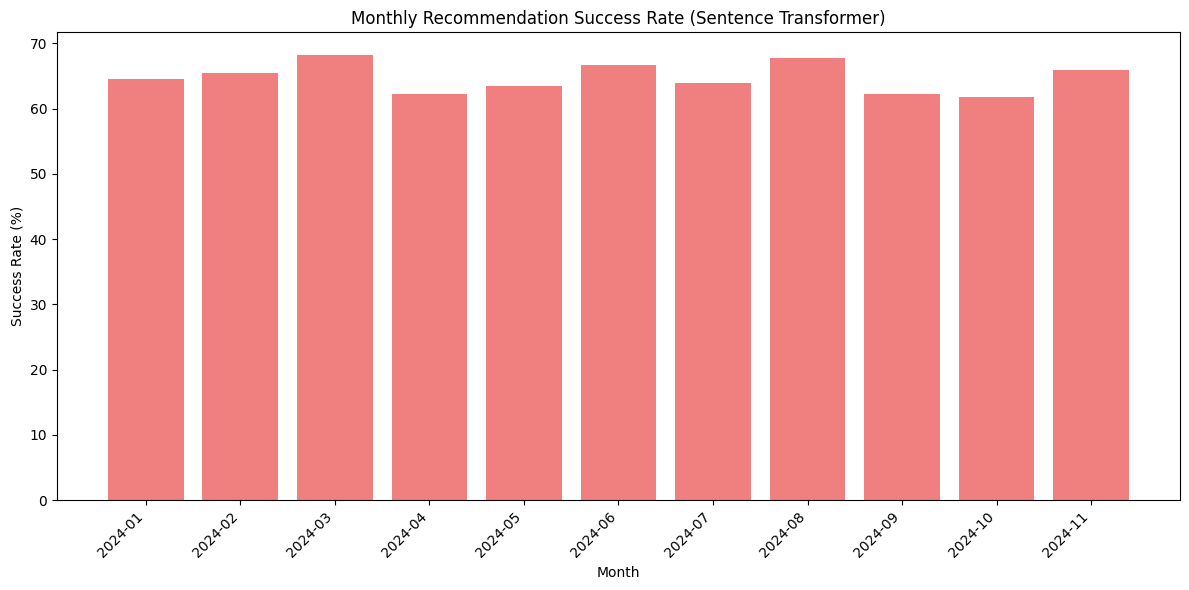

In [ ]:
# Convert 'date' column to datetime objects
result_df['date'] = pd.to_datetime(result_df['date'])

# Extract month and year
result_df['month_year'] = result_df['date'].dt.to_period('M')

# Group by month and count total watches and matches
monthly_summary_sentf = result_df.groupby('month_year').agg(
    total_watches=('movie_watch', 'count'),
    successful_recommendations=('sentf_match', lambda x: (x == True).sum())
).reset_index()

# Calculate success rate
monthly_summary_sentf['success_rate'] = (monthly_summary_sentf['successful_recommendations'] / monthly_summary_sentf['total_watches']) * 100

# Sort by month and year
monthly_summary_sentf = monthly_summary_sentf.sort_values(by='month_year')

# Convert month_year to string for plotting
monthly_summary_sentf['month_year_str'] = monthly_summary_sentf['month_year'].astype(str)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_summary_sentf['month_year_str'], monthly_summary_sentf['success_rate'], color='lightcoral')
plt.xlabel('Month')
plt.ylabel('Success Rate (%)')
plt.title('Monthly Recommendation Success Rate (Sentence Transformer)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Observation**

* The success rate ranges between **\~62% and 68%**, indicating **strong and consistent performance** of the Sentence Transformer-based recommendation system.
    - This drastic improvement in performance is owing to the fact that Sentence Transformers capture contextual and semantic meaning at the sentence level, unlike Word2Vec which only generates static word-level embeddings.
* The **highest success rate** is observed in **March and August 2024 (\~67–68%)**.
* The **lowest success rate** occurs in **October 2024 (\~63%)**.
* Most months maintain a success rate above **64%**, showing **robust recommendation quality** across the year.




# Model Comparison

The Sentence Transformer model significantly **outperforms** both:

* The **Word2Vec-based model** (which ranged between \~17% to 27%)
* The **Past recommendation model** (which had lower success percentages overall of ~13.5%)

This demonstrates that **contextually-rich sentence embeddings from transformers** provide a more accurate and reliable basis for generating recommendations.

# Conclusion

- A NLP-based movie recommendation system was successfully developed using two approaches: Word2Vec-based embeddings and Sentence Transformer models, enabling personalized recommendations based on user and movie textual data.

- The Sentence Transformer model demonstrated superior performance in capturing contextual semantics and user preferences, leading to more accurate and relevant movie recommendations.

- Future enhancements may involve incorporating additional user behavior signals, metadata, and fine-tuning Transformer architectures to further improve recommendation quality and user satisfaction.

# [ADDITIONAL] Deploying the Movie Recommendation Solution

Now that we've seen SentenceTransformer outperform in generating recommendations, let's build a working interface to generate reccomendations.


**Gradio** is a Python library that lets you quickly build and share interactive web interfaces for your machine learning models or functions, allowing users to input data and see real-time outputs.


***Prompt***:

<font size=3 color="#4682B4"><b>Create a Gradio interface that lets users select three movies from a dropdown and recommends similar movies using Sentence Transformers, along with a line-by-line explanation of the code.

</font>

In [ ]:
import gradio as gr # Import the Gradio library, commonly aliased as gr.

# Define the recommendation function that the Gradio interface will use.
# This function takes three movie titles as input.
def gradio_recommend_movies_sentf(movie1_title, movie2_title, movie3_title):
    # Create a list of the input movie titles, filtering out any empty strings.
    watched_movies_titles = [title for title in [movie1_title, movie2_title, movie3_title] if title]

    # Call the existing recommend_movies_sentf function (defined previously)
    # to get recommendations based on the selected movies.
    recommendations = recommend_movies_sentf(watched_movies_titles, data_sentf, model_sentf, n=10)

    # Format the recommendations for display in the Gradio output.
    # Joins the list of recommended movie titles into a single string with newline characters.
    return "\n".join(recommendations)

# Get the list of all movie titles from the DataFrame to populate the dropdowns.
movie_titles = data_sentf['title'].tolist()
movie_titles.insert(0, 'None')
# Create the Gradio interface.
iface = gr.Interface(
    # The function to run when the user interacts with the interface.
    fn=gradio_recommend_movies_sentf,

    # The input components for the function.
    # We use three dropdown components, each populated with the list of movie titles.
    inputs=[
        gr.Dropdown(choices=movie_titles, label="Select Movie 1"), # Dropdown for the first movie selection.
        gr.Dropdown(choices=movie_titles, label="Select Movie 2"), # Dropdown for the second movie selection.
        gr.Dropdown(choices=movie_titles, label="Select Movie 3")  # Dropdown for the third movie selection.
    ],
    # The output component for the function.
    # We use a textbox to display the recommended movie titles.
    outputs=gr.Textbox(label="Recommended Movies"), # Textbox to show the output recommendations.
    # The title of the Gradio interface.
    title="Movie Recommendation System (Sentence Transformers)" # Set the title for the interface.
)

# Launch the Gradio interface.
# The share=True argument creates a public shareable link (useful for Colab).
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b74de89a1a6f1dc497.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**Note:**
We are developing the Gradio interface just to demonstrate the recommendation system. In a real-world scenario, this runs on the backend automatically, taking the user's last watched movie as input and suggesting similar movies accordingly.


<font size=5.5 color="#4682B4"><b>Power Ahead!</font>
___